In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

data1=pd.read_csv("C:/Users/sanif/Documents/project/loandata.csv")

#data summary 
print(data1.describe())


       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


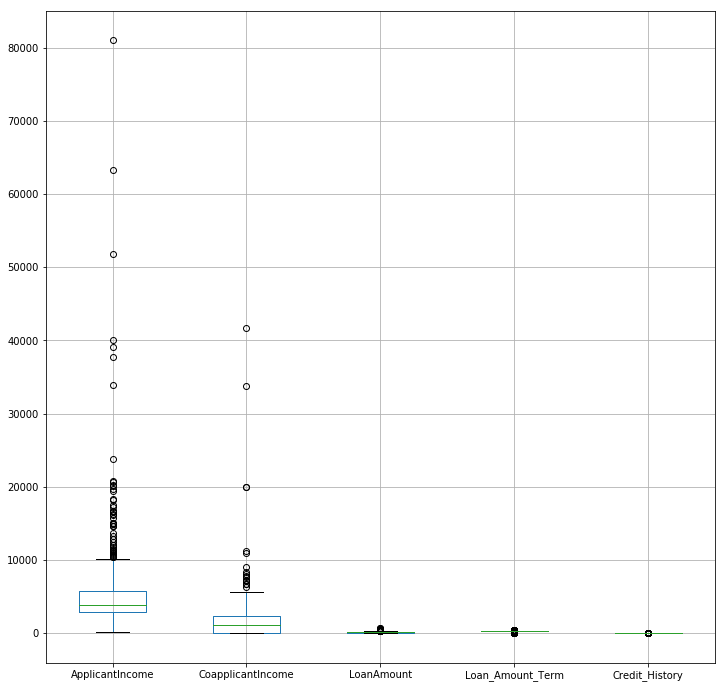

In [35]:
#EDA
#boxplot
data1.boxplot(figsize=(12,12))






In [37]:
#cleaning data
#check missing values
print("\n\n")
print("MISSING VALUE RECORD\n")
print(data1.apply(lambda x:sum(x.isnull()),axis=0))
print("\n\n")

#missing values
data1['Loan_Amount_Term'].fillna(data1['Loan_Amount_Term'].mean(),inplace=True)
data1['LoanAmount'].fillna(data1['LoanAmount'].mean(),inplace=True)
data1['Credit_History'].fillna('1',inplace=True)
data1['Dependents'].fillna('0',inplace=True)
data1['Gender'].fillna('Male',inplace=True)
data1['Self_Employed'].fillna('No',inplace=True)
data1['Married'].fillna('No',inplace=True)



#recheck for missing values
print("UPDATED MISSING VALUE RECORD\n")
print(data1.apply(lambda x:sum(x.isnull()),axis=0))
print("\n\n")






MISSING VALUE RECORD

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64



UPDATED MISSING VALUE RECORD

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64





In [41]:
# converting into numeric
var_mod=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
print(data1.head());
print("CONVERSION TO NUMERIC\n")
for i in var_mod:
    data1[i]=le.fit_transform(data1[i])
print(data1.dtypes)



    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

  Credit_History  Property_Area  Loan_Status  
0              1              2            1  
1              1              0            0  
2          

In [43]:
def apply_model(model,data,predictors,outcome):
      #k-fold with 5 folds
    kf=KFold(n_splits=5,shuffle=False)
    error=[]
    accuracy=[]
    for train,test in kf.split(data):
    #training data
        train_predictors=(data[predictors].iloc[train,:])
        # label using for training.
        train_label=data[outcome].iloc[train]
        #testdata
        test_predictors=data[predictors].iloc[test,:]
        test_label=data[outcome].iloc[test]
    # training the algorithm 
        model.fit(train_predictors,train_label)
    
        x=model.predict(test_predictors)
        accuracy.append(metrics.accuracy_score(test_label,x))
        print("Accuracy for the iteration")
        print(metrics.accuracy_score(test_label,x)*100)
        print("recall")
        print(metrics.recall_score(test_label,x)*100)
        print("\npredicted values\n")
        print(x)
        
    
    print("Mean Accuracy  : %s" % "{0:.3%}\n".format(np.mean(accuracy)))   
  
#CLASSIFICATION MODEL IMPLEMENTATION 

outcome='Loan_Status'
predictor=['Credit_History','Gender','Married','Education','Self_Employed','Property_Area','LoanAmount','Loan_Amount_Term']

#naive bayes
print("\nNaive Bayes\n")
model1=GaussianNB()
apply_model(model1,data1,predictor,outcome)

#decision tree using gini
print("Decision Tree using entropy approach\n")
model2=DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=3, min_samples_leaf=5)
apply_model(model2,data1,predictor,outcome)

#logistic regression
print("logistic Regression\n")
model3=LogisticRegression()
apply_model(model3,data1,predictor,outcome)

#RandomForest 
print("Random Forest")
model4= RandomForestClassifier(criterion='entropy',max_depth=3)
apply_model(model4,data1,predictor,outcome)













Naive Bayes

Accuracy for the iteration
79.67479674796748
recall
97.59036144578313

predicted values

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0]
Accuracy for the iteration
74.79674796747967
recall
95.23809523809523

predicted values

[1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy for the iteration
80.48780487804879
recall
97.70114942528735

predicted values

[1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 